In [4]:
import numpy as np

X = np.array([
    [3, 22000, 1],
    [6, 75000, 0],
    [2, 14000, 1],
    [8, 85000, 0],
    [4, 50000, 1]
], dtype=float)

# Step 1: Standardize
mean = np.mean(X, axis=0)
std = np.std(X, axis=0)
X_std = (X - mean) / std

# Step 2: Covariance Matrix
cov_matrix = np.cov(X_std.T)

# Step 3: Eigen decomposition
eigen_values, eigen_vectors = np.linalg.eig(cov_matrix)

# Step 4: Sort eigenvalues and eigenvectors
idx = np.argsort(eigen_values)[::-1]
eigen_values = eigen_values[idx]
eigen_vectors = eigen_vectors[:, idx]

# Step 5: Project onto top 2 components
X_pca = np.dot(X_std, eigen_vectors[:, :2])
print("Reduced X (PCA):\n", X_pca)


Reduced X (PCA):
 [[ 1.46060919 -0.02977285]
 [-1.6093965  -0.3597175 ]
 [ 1.89708745 -0.31961626]
 [-2.35803385  0.12179788]
 [ 0.60973371  0.58730873]]


In [5]:
import matplotlib.pyplot as plt 

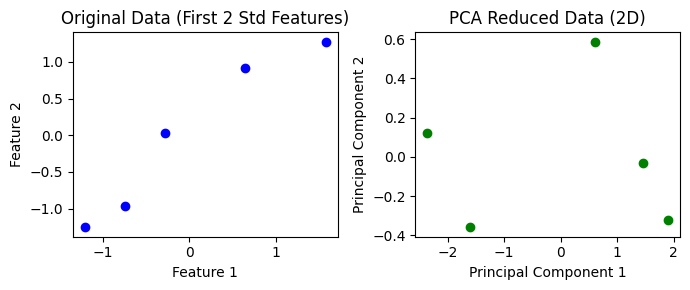

In [8]:
# Visualization: Original vs PCA-reduced
fig, axs = plt.subplots(1, 2, figsize=(7, 3))

# Original 3D data (only first 2 features for 2D visualization)
axs[0].scatter(X_std[:, 0], X_std[:, 1], color='blue')
axs[0].set_title("Original Data (First 2 Std Features)")
axs[0].set_xlabel("Feature 1")
axs[0].set_ylabel("Feature 2")

# PCA reduced 2D data
axs[1].scatter(X_pca[:, 0], X_pca[:, 1], color='green')
axs[1].set_title("PCA Reduced Data (2D)")
axs[1].set_xlabel("Principal Component 1")
axs[1].set_ylabel("Principal Component 2")

plt.tight_layout()
plt.show()